# Reconhecimento de padrões - Projeto 1
## Cláudia Sampedro, Eduardo Barbosa

## Bibliotecas utilizadas

In [3]:
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from scipy.signal import resample
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from librosa.core import stft
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score


## Formatação do arquivo
Formação feita no arquivo de entrada, a fim de convertê-lo de um arquivo de texto para uma matriz de valores numéricos, composta de arrays do numpy.

In [4]:
def read_file(f):
    with open(f) as file:
        text = file.read()
    lines = text.split('\n')
    if lines[len(lines) - 1] == '':
        del lines[len(lines)-1]
    all_lines_formatted = []
    for line in lines:
        line_formatted = []
        for item in line.split(' '):
            if item:
                line_formatted.append(float(item))
        all_lines_formatted.append(line_formatted)
    matrix = np.array(all_lines_formatted)
    return matrix.T

## Classes
As classes da base de dados são referentes aos movimentos captados durante o teste. Por exemplo, a classe I-P indica o movimento realizado foi o "Index-Pointer".

In [5]:
classes = [
    'I-I-',
    'I-M-',
    'IMP-',
    'I-P-',
    'L-L-',
    'M-M-',
    'M-R-',
    'R-L-',
    'R-R-',
    'T-I-',
    'T-L-',
    'T-M-',
    'T-R-',
    'T-T-'
]

## Formatação de todos os arquivos
Os dados utilizados para testes se configuram na seguinte forma: 8 pessoas, 14 movimentos, 4 tentativas para cada movimento, a uma taxa de amostra de 4000Hz durante 10 segundos. Cada pessoa configura uma pasta, onde estão contidos as 4 tentativas de cada movimento. O código abaixo tem a finalidade de percorrer todos os arquivos presentes nas pastas e coletar as informações para o uso posterior.

In [6]:
root_dir = './../dataset/'
persons = []
for (dirpath, dirnames, filenames) in walk(root_dir):
    for dir_name in dirnames:
        print('Person: ' + dir_name)
        for (dirpath, dirnames, filenames) in walk(root_dir + dir_name):
            trials=[]
            for i in range(4):
                data_classes = []
                for classe in classes:
                    data_classes.append(read_file(root_dir + dir_name + '/' + classe + str(i+1) + '.txt'))
                trials.append(np.array(data_classes))
            persons.append(np.array(trials))
            break
print("Finish")


Person: S8-MK
Person: S6-LS
Person: S2-RN
Person: S1-MA
Person: S7-CG
Person: S3-SZ
Person: S5-GH
Person: S4-MN
Finish


## Shapes
### Abaixo estão apresentados os formatos após o pré-processamento dos arquivos.

In [7]:
for person in persons:
    print(person.shape)
print('(Trial, Classes, Channels, Samples)')

(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(4, 14, 8, 40000)
(Trial, Classes, Channels, Samples)


## Distribuição dos dados em 10 segundos

Distribuição dos 40.000 dados em 10 segundos (4000 dados em 10 segundos = 4000x10 = 40000).

In [8]:
d = list()
for e in range(8):
    # distribuindo os 40.000 dados em 10 segundos
    for i, t in enumerate(np.linspace(0, 10, 40000)):
        d.append([e, t, persons[0][0][0][e][i]])
d = np.array(d)
print(d.shape)


(320000, 3)


## Aplica o _Resample_

In [9]:
d = resample(d, 2000)
print(d.shape)

x, y, z = d[:,0], d[:,1], d[:,2]
print(x.shape, y.shape)

(2000, 3)
(2000,) (2000,)


## Plotar o gráfico

Plot do gráfico para ilustrar os Y valores lidos de cada canal X em Z segundos para uma única classe.

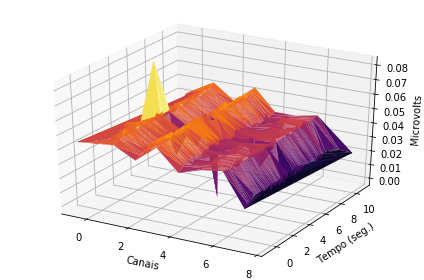

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(x, y, z, cmap=cm.inferno, linewidth=1)
ax.set_xlabel('Canais')
ax.set_ylabel('Tempo (seg.)')
ax.set_zlabel('Microvolts')
#fig.colorbar(surf)
fig.tight_layout()
plt.show()

## Plotando outra classe

(320000, 3)
(2000, 3)
(2000,) (2000,)


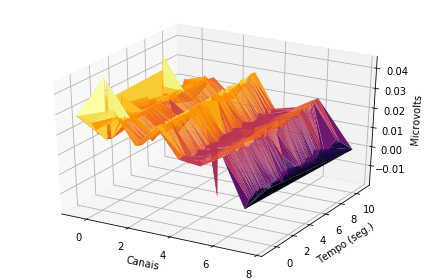

In [11]:
d = list()
for e in range(8):
    # distribuindo os 40.000 dados em 10 segundos
    for i, t in enumerate(np.linspace(0, 10, 40000)):
        d.append([e, t, persons[0][0][1][e][i]])
d = np.array(d)
print(d.shape)


d = resample(d, 2000)
print(d.shape)

x, y, z = d[:,0], d[:,1], d[:,2]
print(x.shape, y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(x, y, z, cmap=cm.inferno, linewidth=1)
ax.set_xlabel('Canais')
ax.set_ylabel('Tempo (seg.)')
ax.set_zlabel('Microvolts')
#fig.colorbar(surf)
fig.tight_layout()
plt.show()


## Plot de mais uma outra classe

(320000, 3)
(2000, 3)
(2000,) (2000,)


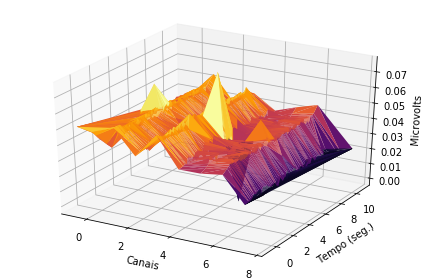

In [12]:
d = list()
for e in range(8):
    # distribuindo os 40.000 dados em 10 segundos
    for i, t in enumerate(np.linspace(0, 10, 40000)):
        d.append([e, t, persons[0][1][0][e][i]])
d = np.array(d)
print(d.shape)


d = resample(d, 2000)
print(d.shape)

x, y, z = d[:,0], d[:,1], d[:,2]
print(x.shape, y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(x, y, z, cmap=cm.inferno, linewidth=1)
ax.set_xlabel('Canais')
ax.set_ylabel('Tempo (seg.)')
ax.set_zlabel('Microvolts')
#fig.colorbar(surf)
fig.tight_layout()
plt.show()


## Obtendo as labels

As labels são os nomes das classes que serão utilizadas nos algoritmos de classificação.

In [13]:
classes_labels = []
for i in range(len(classes)):
    classes_labels.append(classes[i][:len(classes[i])-1])
print(classes_labels)

['I-I', 'I-M', 'IMP', 'I-P', 'L-L', 'M-M', 'M-R', 'R-L', 'R-R', 'T-I', 'T-L', 'T-M', 'T-R', 'T-T']


## Obtenção de características

In [41]:
characteristics_matrix = []

channels = persons[0][0][0]
classes_vector = persons[0][0]
all_characteristics_formatted = []
labels = []
j=0
for classe in classes_vector:
    characteristics_formatted = []
    characteristics_matrix = []
    ## Segmentando cada um dos canais
    segments_index = np.arange(1,40000)
    size = 2000
    step = 1600
    segments = []
    segments_channel = []
    segments_index = [segments_index[i : i + size] for i in range(0, len(segments_index), step)]
    for channel in range(8):
        segments = []
        for index in segments_index:
            segment = []
            for segment_index in index:
                segment.append(classe[channel][segment_index])
            segments.append(segment)
        segments_channel.append(segments)
        
    # Obter características IEMG (soma)
    features_matrix_iemg = []
    for channel in segments_channel:
        features = []
        for segment in channel:
            features.append(np.sum(np.abs(segment)))
        features_matrix_iemg.append(features)

    characteristics_matrix.append(np.array(features_matrix_iemg).T)
    print(np.array(features_matrix_iemg).shape)

    # Obter característica da média (MAV)
    features_matrix_mav = []
    for channel in segments_channel:
        features = []
        for segment in channel:
            features.append(np.sum(np.abs(segment))/len(segment))
        features_matrix_mav.append(features)

    characteristics_matrix.append(np.array(features_matrix_mav).T)
    print(np.array(features_matrix_mav).shape)

    # Obter característica da média "inclinada" (MAVS)

    features_matrix_mavs = []
    for channels in features_matrix_mav:
        mavs = []
        for i in range(len(channels)-1):
            new_mavs = channels[i+1] - channels[i]
            mavs.append(new_mavs)
        mavs.append(channels[i+1])
        features_matrix_mavs.append(mavs)
    characteristics_matrix.append(np.array(features_matrix_mavs).T)
    print(np.array(features_matrix_mavs).shape)

    # Obter característica SSI (Simple Square Integral)

    features_matrix_ssi = []
    for channel in segments_channel:
        features = []
        for segment in channel:
            features.append(np.sum(np.abs(np.power(segment,2))))
        features_matrix_ssi.append(features)

    characteristics_matrix.append(np.array(features_matrix_mav).T)
    print(np.array(features_matrix_ssi).shape)

    # Reduzindo a dimensionalidade da matriz de características
    
    print(np.array(characteristics_matrix).shape)

    characteristics_formatted = []
    for characteristic in characteristics_matrix:
        characteristics_formatted.append(np.concatenate(np.array(characteristic)))
    characteristics_formatted = np.array(characteristics_formatted).T
    print(np.array(characteristics_formatted).shape)
    if(j == 0):
        all_characteristics_formatted = characteristics_formatted
    else:
        all_characteristics_formatted = np.vstack((np.array(all_characteristics_formatted), characteristics_formatted))
    print(np.array(all_characteristics_formatted).shape)
    print(classes[j][:len(classes[j])-1])
    j+=1
    print('---------------------------------------------------------------')
    
    
print(np.array(all_characteristics_formatted).shape)

(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(200, 4)
I-I
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(400, 4)
I-M
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(600, 4)
IMP
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(800, 4)
I-P
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(1000, 4)
L-L
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(1200, 4)
M-M
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(1400, 4)
M-R
---------------------------------------------------------------
(8, 25)
(8, 25)
(8, 25)
(8, 25)
(4, 25, 8)
(200, 4)
(1600, 4)
R-L
----------------------------


## Aplicando o SVM
### Para o domínio do tempo

In [42]:
i = 0
X = np.array(all_characteristics_formatted)
labels = []
results = []
clfs = []
for classe in classes_labels:
    for i in range(len(classes_labels)):
        for j in range(2800):
            if(j >= i*200 and j < (i+1)*200):
                labels.append(classe)
            else:
                labels.append('0')
        y = labels
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True)
        clf = svm.SVC(gamma='auto', class_weight='balanced')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = recall_score(y_test, y_pred, average='binary', pos_label = classe, labels = [classe, '0'])
        print(score)
        results.append(score)
        labels = []
        clfs.append(clf)
    print(classe)
    print('Best classifier index: ' + str(results.index(max(results))))
    results = []
    




0.36619718309859156
0.3055555555555556
0.5813953488372093
0.2714285714285714
0.17105263157894737
0.35064935064935066
0.2808988764044944
0.16666666666666666
0.41025641025641024
0.42105263157894735
0.26881720430107525
0.3670886075949367
0.33766233766233766
0.28
I-I
Best classifier index: 2
0.3382352941176471
0.2413793103448276
0.6111111111111112
0.35714285714285715
0.24705882352941178
0.352112676056338
0.32142857142857145
0.19047619047619047
0.31645569620253167
0.38666666666666666
0.2716049382716049
0.35
0.24675324675324675
0.22535211267605634
I-M
Best classifier index: 2
0.32051282051282054
0.3382352941176471
0.4936708860759494
0.3717948717948718
0.25287356321839083
0.35064935064935066
0.23076923076923078
0.17582417582417584
0.41333333333333333
0.36486486486486486
0.22340425531914893
0.3723404255319149
0.2714285714285714
0.25555555555555554
IMP
Best classifier index: 2
0.2857142857142857
0.2976190476190476
0.5230769230769231
0.2717391304347826
0.21333333333333335
0.3333333333333333
0.30

## Aplicando o LDA
### Para o domínio do tempo

In [35]:
i = 0
X = np.array(all_characteristics_formatted)
labels = []
results = []
clfs = []
for classe in classes_labels:
    for i in range(len(classes_labels)):
        for j in range(2800):
            if(j >= i*200 and j < (i+1)*200):
                labels.append(classe)
            else:
                labels.append('0')
        y = labels
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True)
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = recall_score(y_test, y_pred, average='binary', pos_label = classe, labels = [classe, '0'])
        print(score)
        results.append(score)
        labels = []
        clfs.append(clf)
    print(classe)
    print('Best classifier index: ' + str(results.index(max(results))))
    results = []

0.0
0.0
0.0
0.0
0.20481927710843373
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.023809523809523808
0.06329113924050633
I-I
Best classifier index: 4
0.0
0.0
0.0
0.0
0.21518987341772153
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.012195121951219513
0.08860759493670886
I-M
Best classifier index: 4
0.0
0.0
0.0
0.0
0.19718309859154928
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0136986301369863
0.10588235294117647
IMP
Best classifier index: 4
0.0
0.0
0.0
0.0
0.21176470588235294
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.08695652173913043
I-P
Best classifier index: 4
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.10526315789473684
L-L
Best classifier index: 4
0.0
0.0
0.0
0.0
0.18072289156626506
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.034482758620689655
M-M
Best classifier index: 4
0.0
0.0
0.0
0.0
0.17346938775510204
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.015151515151515152
0.14102564102564102
M-R
Best classifier index: 4
0.0
0.0
0.0
0.0
0.27058823529411763
0.0
0.0
0.0
0.023529411764705882
0.0
0.0
0.0
0.03529411764705882
0.05
R-L
Best classifier 

## Obtendo as características no domínio da frequência

In [33]:
characteristics_matrix = []

channels = persons[0][0][0]
classes_vector = persons[0][0]
all_characteristics_formatted = []
j=0
for classe in classes_vector:
    characteristics_formatted = []
    characteristics_matrix = []
    # Segmentando cada um dos canais
    # Salto de 2000 e overlap de 400
    segments_index = np.arange(1,40000)
    size = 2000
    step = 1600
    segments = []
    segments_channel = []
    segments_index = [segments_index[i : i + size] for i in range(0, len(segments_index), step)]
    for channel in range(8):
        segments = []
        for index in segments_index:
            segment = []
            for segment_index in index:
                segment.append(classe[channel][segment_index])
            segments.append(segment)
        segments_channel.append(segments)
        
    # Obtendo característica MNF
    features_matrix_mnf = []
    for channel in segments_channel:
        features = []
        for segment in channel:
            # aplicando a transformada para o domínio da frequencia
            segment = np.abs(stft(np.array(segment), 1024, 256))
            features.append(np.sum(np.abs(segment)*np.power(np.abs(segment),2))/len(segment))
        features_matrix_mnf.append(features)

    characteristics_matrix.append(features_matrix_mnf)
    print(np.array(features_matrix_mnf).shape)

    # Obtendo característica MF
    
    features_matrix_mf = []
    for channel in segments_channel:
        features = []
        for segment in channel:
            # aplicando a transformada para o domínio da frequencia
            segment = np.abs(stft(np.array(segment), 1024, 256))
            features.append(np.sum(np.abs(segment))/len(segment))
        features_matrix_mf.append(features)

    characteristics_matrix.append(features_matrix_mf)
    print(np.array(features_matrix_mf).shape)
    
    # Reduzindo a dimensionalidade da matriz de característica
    
    print(np.array(characteristics_matrix).shape)

    characteristics_formatted = []
    for characteristic in characteristics_matrix:
        characteristics_formatted.append(np.concatenate(np.array(characteristic)))
    characteristics_formatted = np.array(characteristics_formatted).T
    print(np.array(characteristics_formatted).shape)
    if(j == 0):
        all_characteristics_formatted = characteristics_formatted
    else:
        all_characteristics_formatted = np.vstack((np.array(all_characteristics_formatted), characteristics_formatted))
    print(np.array(all_characteristics_formatted).shape)
    print(classes[j][:len(classes[j])-1])
    j+=1
    print('---------------------------------------------------------------')
    
print(np.array(all_characteristics_formatted).shape)

(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(200, 2)
I-I
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(400, 2)
I-M
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(600, 2)
IMP
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(800, 2)
I-P
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(1000, 2)
L-L
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(1200, 2)
M-M
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(1400, 2)
M-R
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(1600, 2)
R-L
---------------------------------------------------------------
(8, 25)
(8, 25)
(2, 8, 25)
(200, 2)
(1800, 2)
R-R
------------------------------------------

## Aplicando o SVM
### Para o domínio da frequência

In [36]:
i = 0
X = np.array(all_characteristics_formatted)
labels = []
results = []
clfs = []
for classe in classes_labels:
    for i in range(len(classes_labels)):
        for j in range(2800):
            if(j >= i*200 and j < (i+1)*200):
                labels.append(classe)
            else:
                labels.append('0')
        y = labels
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True)
        clf = svm.SVC(gamma='auto', class_weight='balanced')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = recall_score(y_test, y_pred, average='binary', pos_label = classe, labels = [classe, '0'])
        print(score)
        results.append(score)
        labels = []
        clfs.append(clf)
    print(classe)
    print('Best classifier index: ' + str(results.index(max(results))))
    results = []

0.0
0.03529411764705882
0.20481927710843373
0.10588235294117647
0.013513513513513514
0.013513513513513514
0.0
0.05128205128205128
0.04
0.0
0.043010752688172046
0.07042253521126761
0.07142857142857142
0.013333333333333334
I-I
Best classifier index: 2
0.0
0.038461538461538464
0.20224719101123595
0.03488372093023256
0.0
0.013513513513513514
0.013157894736842105
0.07228915662650602
0.0759493670886076
0.06329113924050633
0.03409090909090909
0.043478260869565216
0.0449438202247191
0.014285714285714285
I-M
Best classifier index: 2
0.0
0.04938271604938271
0.20270270270270271
0.0759493670886076
0.0
0.01282051282051282
0.011363636363636364
0.04819277108433735
0.05952380952380952
0.04
0.02666666666666667
0.04285714285714286
0.05333333333333334
0.012048192771084338
IMP
Best classifier index: 2
0.0
0.06172839506172839
0.17857142857142858
0.05128205128205128
0.02631578947368421
0.025974025974025976
0.0125
0.03896103896103896
0.05128205128205128
0.02702702702702703
0.08108108108108109
0.04
0.04109589

## Aplicando o LDA
### Para o domínio da frequência


In [38]:
i = 0
X = np.array(all_characteristics_formatted)
labels = []
results = []
clfs = []
for classe in classes_labels:
    for i in range(len(classes_labels)):
        for j in range(2800):
            if(j >= i*200 and j < (i+1)*200):
                labels.append(classe)
            else:
                labels.append('0')
        y = labels
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True)
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = recall_score(y_test, y_pred, average='binary', pos_label = classe, labels = [classe, '0'])
        print(score)
        results.append(score)
        labels = []
        clfs.append(clf)
    print(classe)
    print('Best classifier index: ' + str(results.index(max(results))))
    results = []

0.0
0.0
0.0
0.0
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.011494252873563218
0.060240963855421686
I-I
Best classifier index: 4
0.0
0.0
0.0
0.0
0.21052631578947367
0.0
0.0
0.0
0.028169014084507043
0.0
0.0
0.0
0.0
0.12643678160919541
I-M
Best classifier index: 4
0.0
0.0
0.0
0.0
0.18823529411764706
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09302325581395349
IMP
Best classifier index: 4
0.0
0.0
0.0
0.0
0.23684210526315788
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.028985507246376812
0.08974358974358974
I-P
Best classifier index: 4
0.0
0.0
0.0
0.0
0.22988505747126436
0.0
0.0
0.0
0.011764705882352941
0.0
0.0
0.0
0.024390243902439025
0.125
L-L
Best classifier index: 4
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.09195402298850575
M-M
Best classifier index: 4
0.0
0.0
0.0
0.0
0.21428571428571427
0.0
0.0
0.0
0.028985507246376812
0.0
0.0
0.0
0.02666666666666667
0.08139534883720931
M-R
Best classifier index: 4
0.0
0.0
0.0
0.0
0.25301204819277107
0.0
0.0
0.0
0.012345679012345678
0.0
0.0
0.0
0.0
0.0864

## Conclusão

Após a conclusão do trabalho, pode-se utilizar os aprendizados de reconhecimentos de padrões de uma maneira prática em uma aplicação com dados de EMG. Desta forma, traze

Várias barreiras foram encontradas durante a elaboração do projeto, em especial, os resultados não terem sidos condizentes com o esperado. Isto provavelmente está relacionado a algum erro em particular, o qual não foi encontrado. Acreditamos que este esteja relacionado a dimensão da matriz necessária para a aplicação dos classificadores. 